#### Title: Classifying Red Wine Quality - Group 21

#### Introduction

"Vinho Verde'' is a Portuguese wine with three variants, of which we will be considering red. In the kaggle dataset we are using from UCI Machine Learning (listed in references), its quality is affected by 11 different physicochemical variables, such as acidity, chlorides, density, etc.. These determine the quality of the wine, on a scale from 0-10. We will conduct our data analysis using three predictors from our dataset: total acidity, alcohol content, and pH. However, since total acidity is not technically within the dataset, we will combine the values of fixed and volatile acidity into a new column.

Our ultimate goal is to create a k-nearest neighbors classifier (off of our dataset) to classify the quality of red wines at different price points that are sourced from outside of the dataset. This will help us determine whether or not the differences in the qualities of the wines generally correspond to their differences in price. We can rephrase this as a predictive research question: Using a k-means classifier to predict the quality of various wines, does a difference in the quality of red wine reflect a difference in its price?

#### Methodology

We decided on the three predictors outlined above due to the online accessibility of this information; many red wine companies do not share the finer contents of their wines, such as sulfur dioxide, density, citric acid, etc. However alcohol content, total acidity, and pH are far more easily found and therefore the best predictors to answer our question, especially important considering that we are sourcing wines from the internet. To further justify our choice of parameters in the analysis section, we will train the model on each parameter separately, to demonstrate that they can produce a high accuracy model by themselves.

Since this report is a classification task, we will build a classifier with the K-nearest neighbors algorithm. It will be trained to recognize the quality of wine based on the three predictors outlined above. We will define good quality wine as having a quality rating over 6.5 and anything below as poor quality - a threshold set by the dataset creators. Good quality wines will be assigned 1 and poor quality wines will be assigned 0. This is done for the purpose of making a binary classifier, rather than a multiclass one, creating more concrete distinctions between the qualities of the wines and avoiding an unnecessarily complex model with lower accuracy. Additionally, since each variable has a small range of values, it will already prove difficult to accurately classify each wine into such specific qualities. Thus, creating a binary classifier eliminates this problem, since there are only two, broad classes to consider.

In our preliminary visualization, we will use a ggpairs matrix to examine the general relationship between the wine class (good or poor) and our chosen predictors, giving us an idea of what parameters thresholds to expect with our classifier. The plot will help us see the mean values of each predictor that fall into either class. Additionally, when we build the classifier, we will have to tune the number of neighbors and create a line plot to show at which k the classifier takes on the highest accuracy. 

#### Preliminary exploratory data analysis

In [1]:
remove.packages("lifecycle")
install.packages("lifecycle")
install.packages("themis")
install.packages("GGally")
install.packages("kknn")

Removing package from ‘/opt/conda/lib/R/library’
(as ‘lib’ is unspecified)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘cli’, ‘rlang’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘pillar’, ‘tibble’, ‘dplyr’, ‘clock’, ‘tidyselect’, ‘vctrs’, ‘recipes’, ‘RANN’, ‘ROSE’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependency ‘reshape’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [1]:
library(dplyr)
library(tidymodels)
library(tidyverse)
options(repr.matrix.max.rows = 6)
library(themis)
library("kknn")
library(GGally)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘tidymodels’ was built under R version 4.1.3”
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tibble       3.2.1
✔ ggplot2      3.3.6     ✔ tidyr        1.2.0
✔ infer        1.0.2     ✔ tune         1.0.0
✔ modeldata    1.0.0     ✔ workflows    1.0.0
✔ parsnip      1.0.0     ✔ workflowsets 1.0.0
✔ purrr        0.3.4     ✔ yardstick    1.0.0
✔ recipes      1.0.5     

Warning message:
“package ‘broom’ was built under R version 4.1.3”
Warning message:
“package ‘dials’ was built under R version 4.1.3”
Warning message:
“package ‘scales’ was built under R version 4.1.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”
Warning message:
“package

After loading in libraries, we first read in the red wine data, using the "mutate" and "ifelse" functions in conjunction to create a new column, distinguishing the wines as good or poor. The original dataset sets the threshold for a good wine at >6.5 and we followed this in our code. We called this new column "new_quality" to make it distinct from the existing "quality" column, and it only contains 0s and 1s to indicate the binary wine quality. In order to use total acidity as a predictor, we use the mutate function to combine the values of the two existing acidity columns. Finally, we removed white spaces from between the column names to be able to later call on them, tidying the data.

In [16]:
options(repr.matrix.max.rows = 6)
# TABLE 1.

red_wine <- read_csv("data/winequality-red.csv")|>
    mutate(new_quality = ifelse(quality < 6.5, 0, 1)) |>
    mutate(new_quality = as_factor(new_quality))

colnames(red_wine) <- make.names(colnames(red_wine))

red_wine <- red_wine |>
    mutate(total.acidity = fixed.acidity + volatile.acidity)
red_wine

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,new_quality,total.acidity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0,8.10
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,0,8.68
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,0,8.56
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6,0,6.810
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5,0,6.545
6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6,0,6.310


Before we build our classifier, we can visualize and create tables for the original data to extract more information from it. We chose to create a simple ggpairs matrix to simultaneously observe the relationships between our chosen predictors and the binary wine quality. Since we are interested in how the quality varies with each predictor, we focussed on the *rightmost four graphs in the matrix*.

Observing the graph of new quality v. total acidity, we noticed that wines falling in the "good" class or the 1 class had a higher mean total acidity. Observing the graphs for the other two predictors, good quality wines had a higher mean alcohol content and lower average pH. However, these averages have a small range, suggesting that the classifier will have some difficulty distinguishing between qualities.

The proportion of good wines to poor wines in the bottom right bar graph shows that good wine is a minority class. This indicates that the data will have to be balanced or upscaled at some point in the analysis to avoid the classifier being biased towards the majority class - poor quality wine - when making predictions on the testing data.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



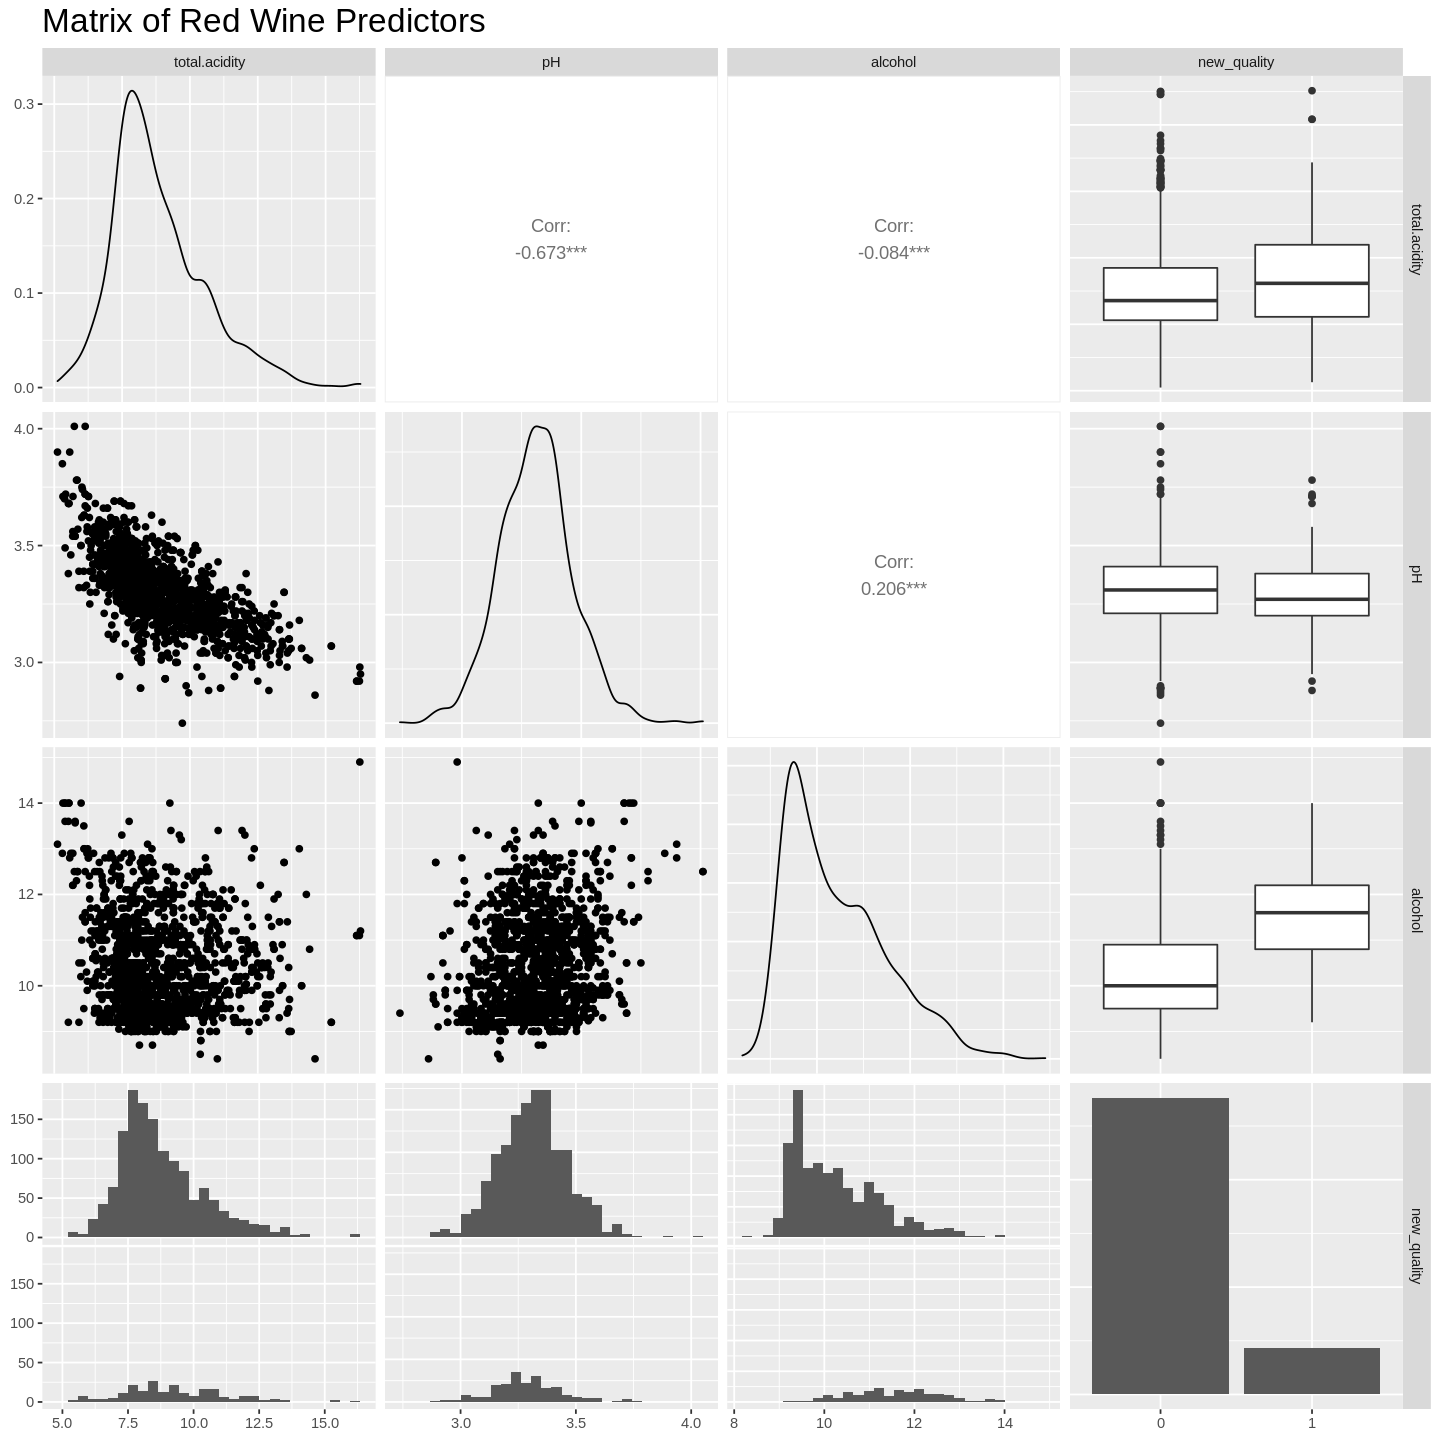

In [18]:
options(repr.plot.height = 12, repr.plot.width = 12)

my_ggpairs <- ggpairs(red_wine, columns = c("total.acidity", "pH", "alcohol", "new_quality")) + 
    ggtitle("Matrix of Red Wine Predictors")+
    theme(plot.title = element_text(size = 20))
my_ggpairs

# FIGURE 1.

We then created three more informative tibbles. The first of these shows the mean values of each predictor which, though not explicitly relevant, shows that the predictors have different scales and that they will need to be normalized to create a reliable classifier. The second tibble shows the exact proportion of poor to good wines, good wines making up only 13.5% of the dataset - further indication that we should balance it. Finally, we determine that there are no missing values in the dataset. 

In [19]:
red_wine_quality_count <- red_wine |>
    group_by(new_quality) |>
    summarize(count = n())

missing_data <- red_wine |>
    summarize(empty_rows = sum(is.na(" ")))

red_wine_mean <- red_wine |>
    select(-quality, -new_quality) |>
    summarize(across(fixed.acidity:total.acidity, mean))

red_wine_mean
red_wine_quality_count
missing_data

# TABLES 2. 3. and 4.

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,total.acidity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.319637,0.5278205,0.2709756,2.538806,0.08746654,15.87492,46.46779,0.9967467,3.311113,0.6581488,10.42298,8.847458


new_quality,count
<fct>,<int>
0,1382
1,217


empty_rows
<int>
0


#### Model Analysis

To train the k-means classifier, we split the mutated red wine data into 75% training and 25% testing data. We specified that the class on which to base the splitting was new_quality, as this is the class we will be working with. In order to make our code reproducible, we set a seed at the beginning, ensuring that the same random numbers are considered for outputs.

In [5]:
set.seed(1930)
red_wine_split <- initial_split(red_wine, prop = 0.75, strata = new_quality)

red_wine_train <- training(red_wine_split)

red_wine_test <- testing(red_wine_split)

To justify the parameters we chose, we ran the cross validation process for each individual predictor, producing model accuracies of 85.15%, 86.31%, and 86.31% for total acidity, pH, and alcohol content respectively. As these percentages are quite high and close together, we chose to use all three in our model to yield the highest accuracy possible (our final model being 87.78% accurate). Due to excessive code repetition, we did not show this process to avoid cluttering the report.

With the split data, we created a recipe for the training data with the three predictors. We scaled and centered all the predictors in the recipe to ensure that each has an equal influence over the model and upsampled the underrepresented wine class to prevent the classifier from overrepresenting "poor" quality wines and making inaccurate predictions.

We then created a knn model for classification and set the neighbors to tune(), since we needed to optimize the *k* value for the final model. The number of neighbors considered in the cross validation will be from 1-10, sequentially.

In [11]:
set.seed(1930)

wine_recipe <- recipe(new_quality~ alcohol + total.acidity + pH, data = red_wine_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) |> 
    step_upsample(new_quality, over_ratio = 1, skip = FALSE)

wine_upscaled <- wine_recipe |>
    prep() |>
    bake(red_wine_train)

wine_recipe_upscaled <- recipe(new_quality~ alcohol + total.acidity + pH, data = wine_upscaled)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

wine_vfold <- vfold_cv(red_wine_train, v = 10, strata = new_quality)

kvals <- tibble(neighbors = seq(1,10))

With the recipe and model created, we passed them into the workflow and generated results for various mean accuracies corresponding to various neighbors. To determine the optimal k, we created a plot of the mean vs. neighbors, identifying this value of k to be 9.

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
9,accuracy,binary,0.8680635,10,0.006432345,Preprocessor1_Model09
10,accuracy,binary,0.8680635,10,0.006432345,Preprocessor1_Model10
1,accuracy,binary,0.8655916,10,0.005661756,Preprocessor1_Model01
⋮,⋮,⋮,⋮,⋮,⋮,⋮
8,accuracy,binary,0.8613476,10,0.009488249,Preprocessor1_Model08
3,accuracy,binary,0.8588620,10,0.008968396,Preprocessor1_Model03
4,accuracy,binary,0.8588620,10,0.008968396,Preprocessor1_Model04


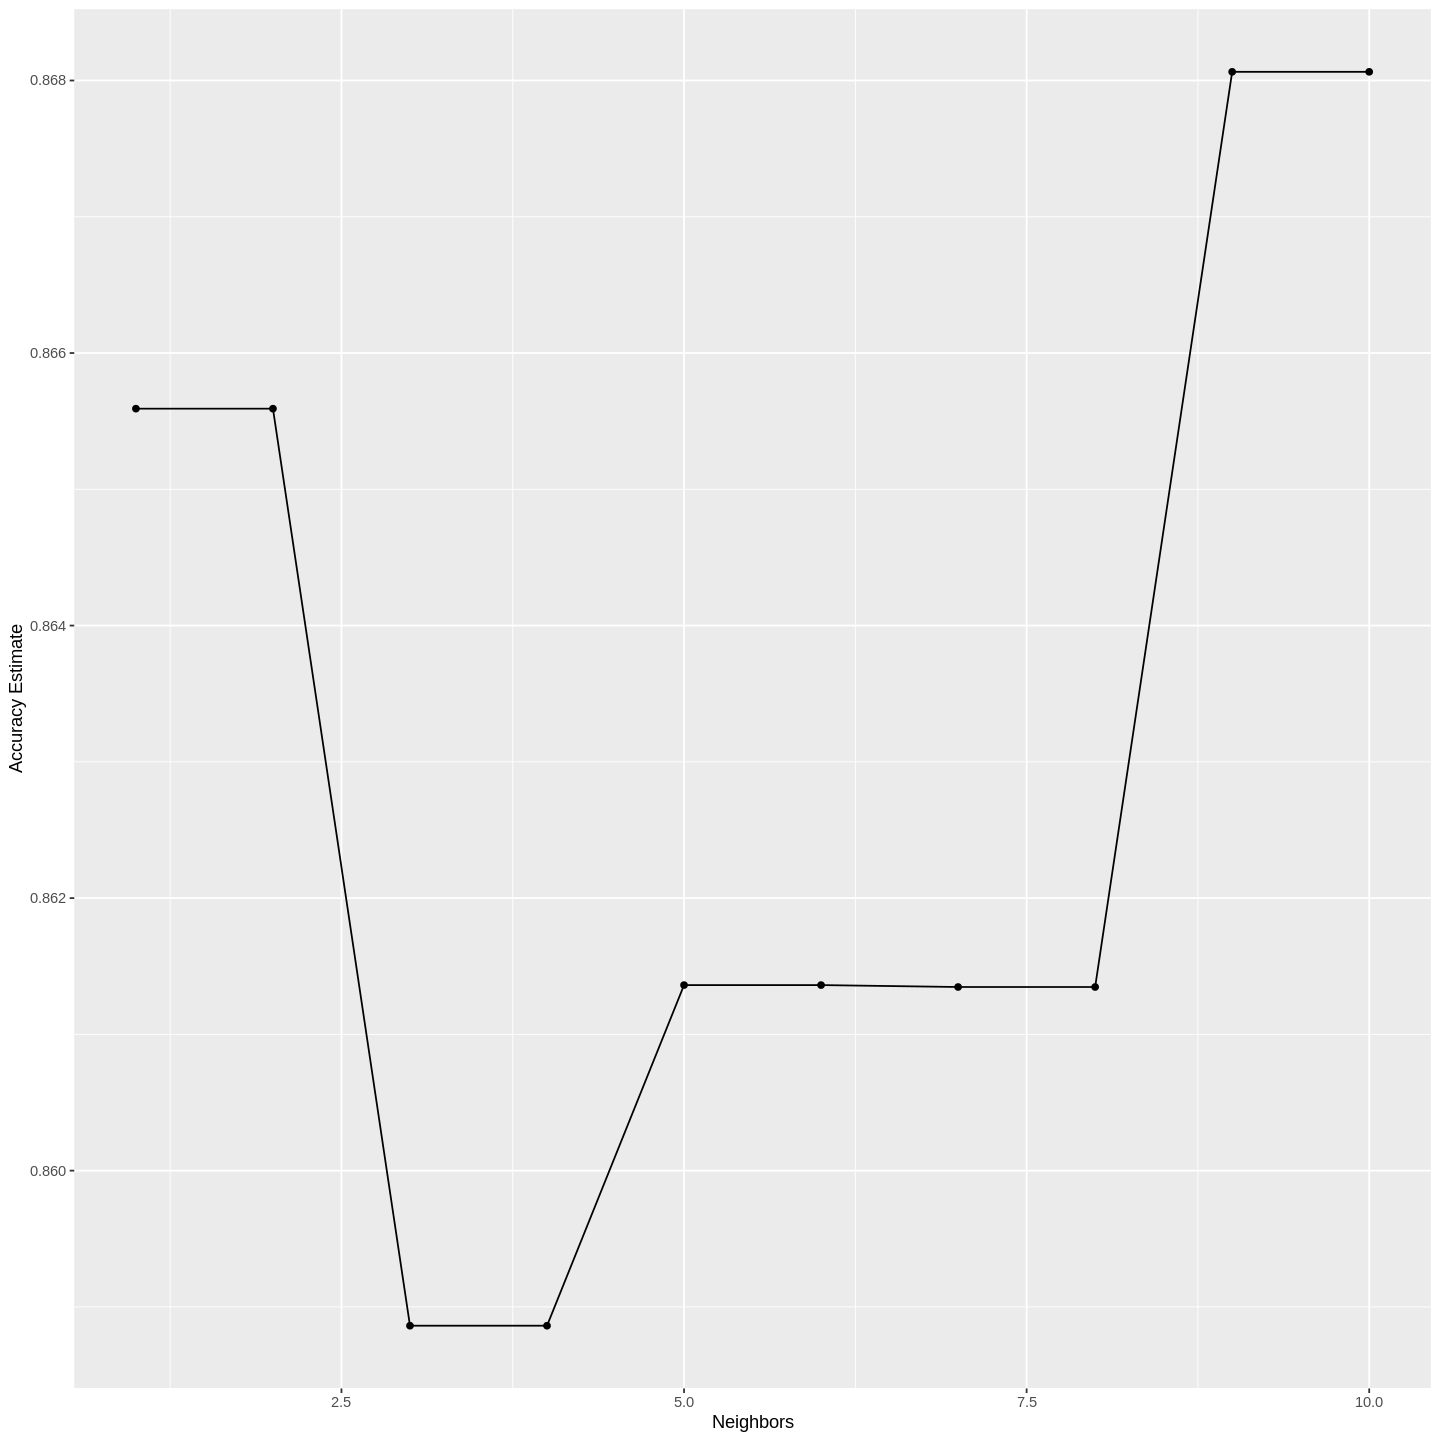

In [12]:
set.seed(1930)
options(repr.max.plot.width = 6, repr.max.plot.height = 6)


wine_results <- workflow() |>
    add_recipe(wine_recipe_upscaled) |>
    add_model(knn_tune) |>
    tune_grid(resamples = wine_vfold, grid = kvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")|>
    arrange(desc(mean))

accuracy_versus_k <- ggplot(wine_results, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate")

accuracy_versus_k
wine_results

#TABLE 5.
#FIGURE 5. 

Having our optimal k, we recreated our classification model, fitting the recipe and model to our training data after passing it through the workflow. The testing data was then used to generate accuracy metrics, including a confusion matrix. With this, our final classifier has a reasonable accuracy of 87.78% using k = 9.

In [13]:
knn_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) |>
    set_engine("kknn") |>
    set_mode("classification")

wine_fit <- workflow() |>
       add_recipe(wine_recipe_upscaled) |>
       add_model(knn_2) |>
       fit(data = red_wine_train)

wine_test_predictions <- predict(wine_fit, red_wine_test) |>
       bind_cols(red_wine_test) |>
       metrics(truth = new_quality, estimate = .pred_class) 

wine_mat <- predict(wine_fit, red_wine_test) |>
       bind_cols(red_wine_test) |> 
       conf_mat(truth = new_quality, estimate = .pred_class)

wine_test_predictions
wine_mat

#TABLE 6.

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8778055
kap,binary,0.3617346


          Truth
Prediction   0   1
         0 334  37
         1  12  18

We successfully built a reliable, binary classifier and can use this to predict the qualities of external wines.[2][3][4] For variety, we selected fifteen cheap, medium-priced, and expensive wines from different websites, taking their predictor details and creating new observations. We then bound them into a data frame and passed it through predict().

The criteria for a cheap, medium, and expensive is <100, 100-1000, and >1000 dollars respectively.


- 14 Hands Hot to Trot Red Blend 2018: **\$9** 
- Bodega Norton 1895 Mendoza 2019: **\$10**
- Bogle Vineyards Merlot: **\$11**
- Bogle Vineyards Essential Red Blend: **\$12**
- Bogle Vineyards Old Vine Zinfandel: **\$12**
- Bin 28 Shiraz 2020: **\$50** (14.5, 3.59, 6.8)
- Bin 389 Cabernet Sauvignon Shiraz 2019: **\$100**
- Magill Estate Shiraz 2016: **\$150**
- St. Henri Shiraz 2019: **\$165**
- Ridge Vineyards Monte Bello 2017: **\$479**
- Grange 2015 Magnum: **\$1,099**
- Grange 2017: **\$1,175**
- Grange 2010: **\$1,175**
- Superblend 802.B Cabernet Shiraz 2018 Magnum: **\$2,250**
- Grange 2016: **\$3,500**

In [14]:
options(repr.matrix.max.rows = 15)

hottotrot_2018 <- c("14 Hands Hot to Trot Red Blend", 9, 13.5, 3.77, 5.3)
merlot <- c("Bogle Vineyards Merlot", 11, 14.5, 3.61, 5.0)
red_blend <- c("Bogle Vineyards Essential Red Blend", 12, 14.5, 3.65, 5.6)
zinfandel <- c("Bogle Vineyards Old Vine Zinfandel", 12, 14.5, 3.66, 5.5)
shiraz_2020 <- c("Bin 28 Shiraz 2020", 50, 14.5, 3.59, 6.8)
cs_shiraz_2019 <- c("Bin 389 Cabernet Sauvignon Shiraz 2019", 100, 14.5, 3.59, 6.7)
shiraz_2016 <- c("Magill Estate Shiraz 2016", 150, 14.5, 3.68, 6.8)
sh_shiraz_2019 <- c("St. Henri Shiraz 2019", 165, 14.5, 3.62, 6.6)
mendoza <- c("Bodega Norton 1895 Mendoza 2019", 10, 13.4, 3.41, 5.32)
monte_bello <- c("Ridge Vineyards Monte Bello 2017", 479, 13.7, 3.48, 7.42)
grange_2015 <- c("Grange 2015 Magnum", 1099, 14.5, 3.62, 6.7)
grange_2016 <- c("Grange 2017", 1175, 14.5, 3.63, 7.3)
grange_2017 <- c("Grange 2010", 2250, 14.5, 3.61, 7.0)
grange_2010 <- c("Superblend Cabernet Shiraz 2018 Magnum", 2250, 14.5, 3.57, 6.9)
shiraz_2018 <- c("Grange 2016", 3500, 14.5, 3.60, 7.1)

wine_tibble <- tibble(
    name = character(),
    price = double(),
    acohol.content = double(),
    pH = double(),
    total.acidity = double())

wine_tib <- rbind(
    wine_tibble,
    hottotrot_2018,
    mendoza,
    merlot,
    red_blend,
    zinfandel,
    shiraz_2020,
    cs_shiraz_2019,
    shiraz_2016,
    sh_shiraz_2019,
    monte_bello,
    grange_2015,
    grange_2016,
    grange_2017,
    grange_2010,
    shiraz_2018)

colnames(wine_tib) <- c("name", "price", "alcohol", "pH", "total.acidity")

wine_tib <- wine_tib |>
    mutate(price = as.double(price),
           alcohol = as.double(alcohol),
           pH = as.double(pH),
           total.acidity = as.double(total.acidity))
wine_tib

#TABLE 7.

name,price,alcohol,pH,total.acidity
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
14 Hands Hot to Trot Red Blend,9,13.5,3.77,5.30
Bodega Norton 1895 Mendoza 2019,10,13.4,3.41,5.32
Bogle Vineyards Merlot,11,14.5,3.61,5.00
Bogle Vineyards Essential Red Blend,12,14.5,3.65,5.60
Bogle Vineyards Old Vine Zinfandel,12,14.5,3.66,5.50
Bin 28 Shiraz 2020,50,14.5,3.59,6.80
Bin 389 Cabernet Sauvignon Shiraz 2019,100,14.5,3.59,6.70
Magill Estate Shiraz 2016,150,14.5,3.68,6.80
St. Henri Shiraz 2019,165,14.5,3.62,6.60


In [15]:
options(repr.matrix.max.rows = 15)
wine_predictions <- predict(wine_fit, wine_tib) |>
       bind_cols(wine_tib)
wine_predictions

# TABLE 8.

.pred_class,name,price,alcohol,pH,total.acidity
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,14 Hands Hot to Trot Red Blend,9,13.5,3.77,5.30
0,Bodega Norton 1895 Mendoza 2019,10,13.4,3.41,5.32
1,Bogle Vineyards Merlot,11,14.5,3.61,5.00
1,Bogle Vineyards Essential Red Blend,12,14.5,3.65,5.60
1,Bogle Vineyards Old Vine Zinfandel,12,14.5,3.66,5.50
1,Bin 28 Shiraz 2020,50,14.5,3.59,6.80
1,Bin 389 Cabernet Sauvignon Shiraz 2019,100,14.5,3.59,6.70
1,Magill Estate Shiraz 2016,150,14.5,3.68,6.80
1,St. Henri Shiraz 2019,165,14.5,3.62,6.60


#### Discussion of Results

Above, we find that the classifier predicted a majority of the wines to be good, only three being poor. When observing the parameters of these poor quality wines, we see that they have comparatively much lower alcohol content, relatively lower pH values, and high acidities. Because of the drastic difference between their alcohol content, we believe that this is the greatest parameter responsible for their quality. We also observe how the acidities of the wines climb with their price, increasing steadily from 5.00 g/L to 7.10 g/L, however, this seemingly has no effect on quality since some cheap wines with high acidity are classified as good quality.

In observing the relationship between price and quality, the price of red wine is not correlated (necessarily) to its quality, according to our classifier. The parameters for cheap wines can be similar to those of expensive wines and still be graded high quality. However, as winemaking is complex, with different factors such as grape quality, age, and region, we suspect there are important variables not included in the data. With a different classifier that considers these, the predictions could very well change and show a different correlation.

Although our analysis may not have a significant impact on the wine industry, we have demonstrated ways in which data collection can be used to identify patterns in wine varieties. Our report has demonstrated that given wines of the same variety (like Vinho Verde), it is possible to train a high accuracy quality classifier with a k-means algorithm which could prove to be a way to scientifically/objectively back the rubric for wine scoring, for example.

Naturally, we expected that higher priced wines would correspond to higher qualities but it is possible that our classifier does not consider specific variables used by the wine industry. This leads to future questions about which variable in wine production is considered most important to quality, or whether there is any physicochemical correlation at all between price and quality (how arbitrarily are wines priced?).

#### Strengths

The strengths of our classifier can be attributed to our manipulation of the data before making the final classification model. By changing what would have been a multiclass classifier into a binary classifier, our classification results were easy to interpret and more accurate than one would have been, had it accounted for 10 different classes. By standardizing and balancing the data, we ensured that the model considered all values equally and that the underrepresented class was not ignored. In order to avoid misfitting the data, we tuned our k values with cross-validation, ensuring that the final model used the number of neighbors that would yield the highest accuracy. Given our data wrangling, the model itself, not considering external data, is a strong classifier.

#### Limitations

Given the inconsistent predictions, the classifier falls short in a number of ways. Firstly, limited online information of wine makeup meant that we could only use 3 predictors, when using more would have allowed higher accuracy in both the classifier and its external wine predictions. If we had access to a website with wines from a range of prices, and with their exact chemical composition, this would make our research question easier to answer.

While we cannot say that using a Vinho Verde-specific classifier for other wines is inaccurate, since wine quality is assessed on universal physico-chemical properties, we must consider that this data is specifically Vinho Verde. Whereas, the wines we sourced from the internet are not. This was done to avoid using Vinho Verde wines that were already included in the data set. However, this indicates that the predicted qualities of these wines do not necessarily reflect their actual qualities. This could be shown by the inconsistencies in how the differently priced wines are classified; cheap (non-Vinho Verde) wines classified as good quality may not necessarily be good quality because they are a different variety, and this limitation is worsened by the low number of predictors available.

#### References

[1] P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.


[2] Our Wines. All Wines | Penfolds Wines | Penfolds Wines. (n.d.). Retrieved April 15, 2023, from https://www.penfolds.com/en-ca/wines 

[3] Bogle Vineyards. Bogle. (n.d.). Retrieved April 15, 2023, from https://shop.boglewinery.com/bogle-c6.aspx 

[4] Red wine. WeSpeakWine.com. (n.d.). Retrieved April 15, 2023, from https://www.wespeakwine.com/categories/Wine-Type/Red-Wine?sort=PriceDesc&amp;catID=3566 